# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/data/NBA_players_2015.csv), [data dictionary](https://github.com/JamesByers/GA-SEA-DAT1/blob/master/slides/07_nba_paper.pdf)
- **Problem to solve:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [1]:
# read the data into a DataFrame named nba
import pandas as pd
path = '../data/'
url = path + 'NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [2]:
# examine the columns names to see what's there
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [5]:
# examine the number of players in each position to get a feel for the data
nba.groupby('pos').count()

,season_end,player,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
pos,,,,,,,,,,,,,,,,,,,,,
C,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
F,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
G,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [6]:
# map positions to numbers
# Specifically map the position names (C, F and G) to numbers starting with 0
#   and store them in a new column named 'pos_num'.
# We need to do this because KNN model algorithms require that the features
#   and responses be numeric.
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [10]:
# create feature matrix (X) (it is a dataframe) that contains these columns from the nba dataframe:
# 'ast', 'stl', 'blk', 'tov', 'pf'
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [13]:
# create response vector (y) that contains the position numbers (our labels)
y = nba.pos
y.shape

(478L,)

## Step 3: Train a KNN model (K=5)

In [7]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# instantiate the estimator with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
# run a knn.fit on the data to build the model
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Use the model:
## Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [15]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [47]:
# make a prediction with the model
knn.predict([player])

array(['G'], dtype=object)

In [46]:
# calculate the predicted probabilities
knn.predict_proba([player])

array([[ 0. ,  0.2,  0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [44]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict([player])

array(['G'], dtype=object)

In [45]:
# calculate predicted probabilities
knn.predict_proba([player])

array([[ 0. ,  0.2,  0.8]])

## Bonus: Explore the features to ones ones that likely are the most predictive

In [27]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [43]:
# get a describe of assists grouped by position.  Use .unstack() to format the output
nba[(nba.pos == 'G')]['ast'].describe()


count    200.000000
mean       2.729000
std        2.128287
min        0.000000
25%        1.100000
50%        2.250000
75%        3.800000
max       10.200000
Name: ast, dtype: float64

In [48]:
nba['ast'].describe()

count    478.000000
mean       1.786611
std        1.773799
min        0.000000
25%        0.600000
50%        1.200000
75%        2.400000
max       10.200000
Name: ast, dtype: float64

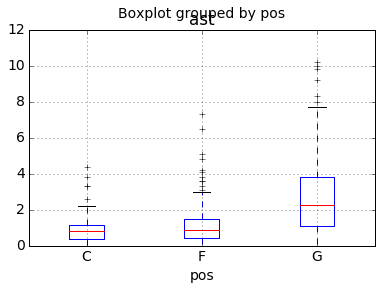

In [33]:
# box plot of assists grouped by position
nba.boxplot(column = 'ast', by = 'pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000112EB5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011770E80>]], dtype=object)

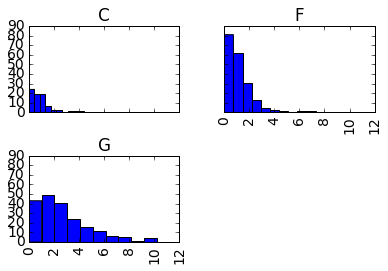

In [37]:
# group plot of histograms of assists grouped by position
nba.hist(column = 'ast', by = 'pos', sharex=True, sharey=True)

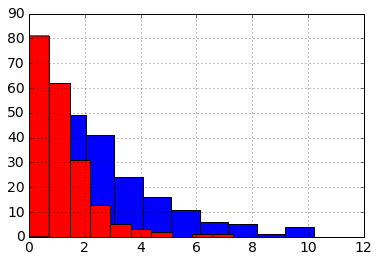

In [53]:
#plt.hist(nba.groupby('pos')['ast'])
nba[(nba.pos == 'G')]['ast'].hist()
nba[(nba.pos == 'C')]['ast'].hist()
nba[(nba.pos == 'F')]['ast'].hist()